### 신경망

In [3]:
# 계단 함수 -> x가 0보다 크면 1 반환 이외에는 0
def step_function1(x):
    if x>0:
        return 1
    else:
        return 0

In [21]:
def step_function2(x):
    y=x>0
    return y.astype(int) # False면 0, True면 1

In [9]:
import numpy as np
x= np.array([-1.0, 1.0, 2.0])
y=x>0
x,y

(array([-1.,  1.,  2.]), array([False,  True,  True]))

In [19]:
y=y.astype(int)
y

array([0, 1, 1])

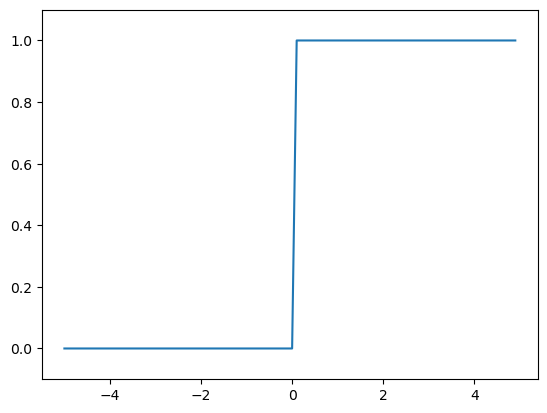

In [25]:
import matplotlib.pylab as plt

def step_function3(x):
    return np.array(x>0, dtype=int)

x=np.arange(-5.0, 5.0, 0.1)
y=step_function3(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

### sigmoid func

In [28]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [32]:
x=np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [34]:
t=np.array([1.0,2.0,3.0])
1.0+t, 1.0/t

(array([2., 3., 4.]), array([1.        , 0.5       , 0.33333333]))

x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### ReLU func

In [41]:
def relu(x):
    return np.maximun(0,x)

### mult dim arr

In [48]:
A=np.array([1,2,3,4])
print(A)
np.ndim(A), A.shape, A.shape[0]

[1 2 3 4]


(1, (4,), 4)

In [50]:
B=np.array([[1,2],[3,4],[5,6]])
print(B)
np.ndim(B), B.shape

[[1 2]
 [3 4]
 [5 6]]


(2, (3, 2))

In [52]:
A=np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [54]:
B=np.array([[5,6],[7,8]])
B.shape

(2, 2)

In [56]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [58]:
A=np.array([[1,2,3],[4,5,6]])
A.shape

(2, 3)

In [62]:
B=np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [64]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [66]:
C=np.array([[1,2],[3,4]])
C.shape

(2, 2)

In [68]:
A.shape

(2, 3)

In [70]:
np.dot(A,C) # error

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [72]:
A=np.array([[1,2],[3,4],[5,6]])
B=np.array([7,8])
np.dot(A,B)

array([23, 53, 83])

In [78]:
X=np.array([1,2])
W=np.array([[1,3,5],[2,4,6]])
print(W)
Y=np.dot(X,W)
print(Y)

[[1 3 5]
 [2 4 6]]
[ 5 11 17]


### 3층 신경망

In [81]:
X=np.array([1.0,0.5])
W1=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1=np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1=np.dot(X,W1)+B1

(2, 3)
(2,)
(3,)


In [83]:
Z1=sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [87]:
W2=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2=np.array([0.1,0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2=np.dot(Z1,W2)+B2
Z2=sigmoid(A2)

(3,)
(3, 2)
(2,)


In [89]:
def identity_function(x):
    return x

W3=np.array([[0.1,0.3],[0.2,0.4]])
B3=np.array([0.1,0.2])

A3=np.dot(Z2,W3)+B3
Y=identity_function(A3)

In [91]:
def init_network():
    network={}
    network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1']=np.array([0.1,0.2,0.3])
    network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2']=np.array([0.1,0.2])
    network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
    network['b3']=np.array([0.1,0.2])

    return network

def forward(network, x):
    W1, W2, W3=network['W1'], network['W2'], network['W3']
    b1, b2, b3=network['b1'], network['b2'], network['b3']

    a1=np.dot(x,W1) + b1
    z1=sigmoid(a1)
    a2=np.dot(z1,W2)+b2
    z2=sigmoid(a2)
    a3=np.dot(z2,W3)+b3
    y=identity_function(a3)

    return y

network=init_network()
x=np.array([1.0,0.5])
y=forward(network, x)
print(y)

[0.31682708 0.69627909]
